### Assignment 3 was completed alone

# Assignment 3: K-means

The **objective** of this assignment is to present the use of scikit-learn functionalities concerning automatic classification with k-means, as well as to contribute to a better understanding of this method and the impact on the results of the data distribution or initialization technique (random initialization or k-means++). For this, data generated in a controlled manner are first examined and then real data seen in progress, with or without pre-processing to reinforce the separation between groups.

In [ ]:
import numpy as np    
from sklearn.utils import shuffle

# generation of 100 3D points according to the centered normal law
# each group is translated by a vector [3,3,3]
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]

# generation of labels for each group
c1 = np.ones(100)
c2 = 2 * np.ones(100)
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)

# concatenation of data in a matrix
data = np.concatenate((d1,d2,d3,d4,d5))
labels = np.concatenate((c1, c2, c3, c4, c5))
print(data.shape)
# random permutation of the rows of the data matrix
data, labels = shuffle(data, labels)

Visualize the starting groups:

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# The color of the points depends on their label
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
plt.show()

Apply automatic classification with K-means, first with a single trial (a single initialization followed by a single execution of *K-means*, n_init=1) using the k-means++ initialization method:

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)

Review the parameters, attributes, and methods of the sklearn.cluster.KMeans class by following the link given above. The predicted groups for the data can be obtained using the predict(X) method:

In [ ]:
pred = kmeans.predict(data)

Groups associated with training examples are also stored in the kmeans.labels_ attribute:

In [ ]:
print(kmeans.labels_)

Visualize the results of this classification:

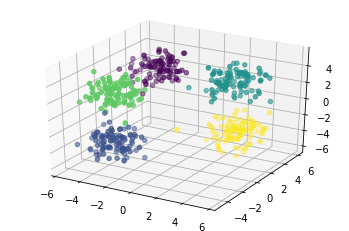

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred)
plt.show()

It is possible to assess the consistency between the starting groups and the partitioning found by K-means using the adjusted Rand index:

In [8]:
from sklearn import metrics
metrics.adjusted_rand_score(pred, labels)

0.9949848742198414

The call to metrics.adjusted_rand_score() compares the partitioning obtained by the automatic classification (pred group labels) with the partitioning corresponding to the groups defined at the start (labels stored in labels).

Now apply automatic classification with K-means with a single trial (n_init = 1) using the random initialization method:


In [9]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

1.0

It can be seen that the groups resulting from the automatic classification give only a few indications on the classes present in these data.

In [10]:
newData = np.random.rand(500,3)

kmeans = KMeans(n_clusters=5,init='k-means++').fit(newData)
newKMeans = KMeans(n_clusters=5,n_init=1,init='random').fit(newData)
metrics.adjusted_rand_score(newKMeans.labels_, kmeans.labels_)

newKMeans = KMeans(n_clusters=5,n_init=1,init='random').fit(newData)
metrics.adjusted_rand_score(newKMeans.labels_, kmeans.labels_)

newKMeans = KMeans(n_clusters=5,n_init=1,init='k-means++').fit(newData)
metrics.adjusted_rand_score(newKMeans.labels_, kmeans.labels_)

newKMeans = KMeans(n_clusters=5,n_init=1,init='k-means++').fit(newData)
metrics.adjusted_rand_score(newKMeans.labels_, kmeans.labels_)


0.29744447606074287

## Question 5 code

In [12]:
textures = np.loadtxt('texture.dat')
np.random.shuffle(textures)
kmeans = KMeans(n_clusters=11).fit(textures[:,:40])
metrics.adjusted_rand_score(kmeans.labels_, textures[:,40])

0.5460667151421391

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

lda = LinearDiscriminantAnalysis()
lda.fit(textures[:,:40],textures[:,40])

texturest = lda.transform(textures[:,:40])

newKMeans = KMeans(n_clusters=11).fit(texturest)
ldaScore = metrics.adjusted_rand_score(newKMeans.labels_, textures[:,40])

print(ldaScore)

0.9900757931495917


In [14]:
#extract 3 columns from the LDA transformed dataset to generate 3D plot

textureVis = []

for i in range(3):
  textureVis.append([row[i] for row in texturest])

#print(textureVis[0])

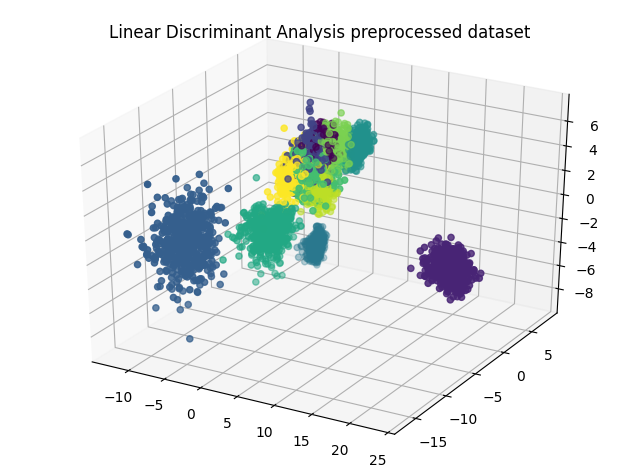

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6), dpi= 100)
ax = fig.add_subplot(111, projection='3d')

newLabels = newKMeans.labels_
ax.scatter(textureVis[0], textureVis[1], textureVis[2], c=newLabels)
plt.title("Linear Discriminant Analysis preprocessed dataset")
plt.show()
